<a href="https://colab.research.google.com/github/manjushree7/AI-ML/blob/main/2331414_ManjushreeTamang_Workshop5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implement an End to End CNN Model for Image Classification Task.

Task 1: Data Understanding and Visualization:

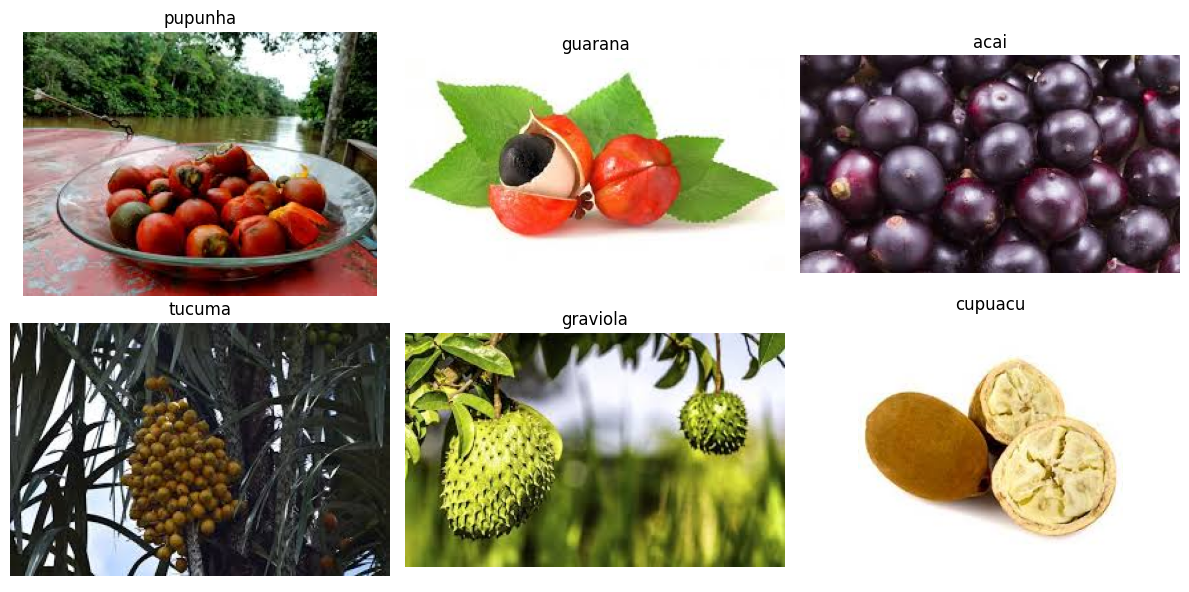

In [1]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Path to the dataset
dataset_path = '/content/drive/MyDrive/Colab Notebooks/AI and ML/Week5/FruitinAmazon/train'

# Get class directories
class_dirs = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

# Select one random image per class
selected_images = [(os.path.join(dataset_path, d, random.choice(os.listdir(os.path.join(dataset_path, d)))), d)
                    for d in class_dirs if os.listdir(os.path.join(dataset_path, d))]

# Define grid size (2 rows)
num_classes = len(selected_images)
cols = (num_classes + 1) // 2  # Ensure at least 2 rows
rows = 2

# Create figure
fig, axes = plt.subplots(rows, cols, figsize=(12, 6))
axes = axes.flatten()

# Display images
for ax, (img_path, label) in zip(axes, selected_images):
    ax.imshow(Image.open(img_path))
    ax.set_title(label)
    ax.axis("off")

# Hide any unused subplots
for ax in axes[len(selected_images):]:
    ax.axis("off")

plt.tight_layout()
plt.show()

**What did you observe ?**


When visualizing the images, I noticed that each class has a unique image, indicating a well-organized dataset. However, there are variations in image sizes, lighting conditions, and backgrounds. These differences suggest that our image recognition model must be adaptable to accurately identify fruits despite these inconsistencies.

In [19]:
# Define the path to the training dataset
train_dir = '/content/drive/MyDrive/Colab Notebooks/AI and ML/Week5/FruitinAmazon/train'

# List all class directories
class_dirs = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

corrupted_images = []  # List to store corrupted image paths

# Iterate through each class subdirectory
for class_dir in class_dirs:
    class_path = os.path.join(train_dir, class_dir)

    # List all image files in the directory
    images = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    for image in images:
        image_path = os.path.join(class_path, image)

        try:
            # Attempt to open and verify the image
            with Image.open(image_path) as img:
                img.verify()  # Verify the image integrity

        except (IOError, SyntaxError):
            # If an error occurs, consider it a corrupted image
            corrupted_images.append(image_path)
            os.remove(image_path)
            print(f"Removed corrupted image: {image_path}")

# Final report
if not corrupted_images:
    print("No Corrupted Images Found.")

No Corrupted Images Found.


# Task 2

Loading and Preprocessing Image Data in keras:


In [20]:
import tensorflow as tf
# Define image size and batch size
img_height = 128 # Example image height
img_width = 128 # Example image width
batch_size = 32
validation_split = 0.2 # 80% training, 20% validation
# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255) # Normalize pixel values to [0, 1]
# Create training dataset with normalization
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  labels="inferred",
  label_mode="int",
  image_size=(img_height, img_width),
  interpolation="nearest",
  batch_size=batch_size,
  shuffle=True,
  validation_split=validation_split,
  subset="training",
  seed=123
)
# Apply the normalization (Rescaling) to the dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))
# Create validation dataset with normalization
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  labels="inferred",
  label_mode="int",
  image_size=(img_height, img_width),
  interpolation="nearest",
  batch_size=batch_size,
  shuffle=False,
  validation_split=validation_split,
  subset="validation",
  seed=123
)
# Apply the normalization (Rescaling) to the validation dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


# Task 3

Implement a CNN with the following Structure and Hyper - parameters:

In [4]:
import numpy as np

# If using tf.data.Dataset
unique_labels = set()
for _, labels in train_ds:
    unique_labels.update(np.unique(labels.numpy()))
print("Unique labels:", unique_labels)
print("Number of classes:", len(unique_labels))

Unique labels: {np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5)}
Number of classes: 6


In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Function to create the CNN model
def create_cnn_model(input_shape, num_classes):
    model = keras.Sequential([
        # Convolutional Layer 1
        layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", strides=1, activation="relu", input_shape=input_shape),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),

        # Convolutional Layer 2
        layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", strides=1, activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),

        # Flatten layer
        layers.Flatten(),

        # Fully Connected Layers
        layers.Dense(64, activation="relu"),
        layers.Dense(128, activation="relu"),

        # Output Layer (Softmax for multi-class classification)
        layers.Dense(num_classes, activation="softmax")
    ])

    return model

# Define parameters
input_shape = (128, 128, 3)  # Example input shape (128x128 RGB images)
num_classes = 6  # Adjust based on dataset

# Create the model
model = create_cnn_model(input_shape, num_classes)

# Print model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

# Task 4

Compile the Model

In [6]:
# Compile the model
model.compile(
    optimizer="adam",  # Adam optimizer
    loss="sparse_categorical_crossentropy",  # Loss function for multi-class classification
    metrics=["accuracy"]  # Evaluate model performance
)

print("Model compiled successfully!")

Model compiled successfully!


Model Training

In [ ]:
import ModelCheckpoint
import EarlyStopping

# Callbacks
checkpoint = ModelCheckpoint(
    "best_model.h5",  # Save the best model based on validation accuracy
    monitor="val_accuracy",  # Monitor validation accuracy
    save_best_only=True,  # Save only the best model
    mode="max",  # We want to maximize validation accuracy
    verbose=1
)

early_stopping = EarlyStopping(
    monitor="val_loss",  # Monitor validation loss
    patience=10,  # Stop training if no improvement for 10 epochs
    restore_best_weights=True,  # Restore the best model weights after stopping
    verbose=1
)

# Combine callbacks
callbacks = [checkpoint, early_stopping]

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks
)

# Task 5

Evaluate the Model

In [9]:
# Evaluate the model on the test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/AI and ML/Week5/FruitinAmazon/test',  # specify the path to your test directory
    labels='inferred',
    label_mode='int',
    image_size=(128, 128),
    batch_size=batch_size
)

test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.2000 - loss: 13.2396
Test Loss: 13.239629745483398
Test Accuracy: 0.20000000298023224


# Task 6

Save and Load the Model

In [10]:
model.save('final_model.h5')

In [11]:
loaded_model = tf.keras.models.load_model('final_model.h5')

In [12]:
# Evaluate the loaded model
test_loss, test_accuracy = loaded_model.evaluate(test_ds)

print(f"Test Accuracy: {test_accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step - accuracy: 0.2000 - loss: 13.2396
Test Accuracy: 0.2000


# Task 7

Predictions and Classification Report

In [13]:
import numpy as np
from sklearn.metrics import classification_report

# Make predictions on the test dataset
predictions = model.predict(test_ds)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels from the test dataset
true_labels = []
for _, labels in test_ds:
    true_labels.extend(labels.numpy())

# Convert the true labels into a numpy array
true_labels = np.array(true_labels)

# Print the classification report
print(classification_report(true_labels, predicted_labels))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         5
           3       0.12      0.60      0.19         5
           4       0.00      0.00      0.00         5
           5       0.50      0.20      0.29         5

    accuracy                           0.13        30
   macro avg       0.10      0.13      0.08        30
weighted avg       0.10      0.13      0.08        30



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
# List files in the current directory
print(os.listdir())

['.config', 'drive', 'final_model.h5', 'sample_data']


In [17]:
import shutil
# Move the model to a new directory
shutil.move("final_model.h5","/content/drive/MyDrive/Colab Notebooks/AI and ML/Week5")

'/content/drive/MyDrive/Colab Notebooks/AI and ML/Week5/final_model.h5'